In [409]:
import geopandas as gpd
import matplotlib.pyplot as plt
import wbdata
import pandas as pd
import cartopy
import re
import numpy as np
%matplotlib inline
%store -r FHFAWB_df

# world.plot(column='gdp_per_cap')
# world.plot(column='gdp_per_cap', cmap='OrRd')
# world.plot(column='gdp_per_cap', cmap='OrRd', scheme='quantiles')

In [ ]:
'''
Cheatsheet_________________________________
Function	Description
count	Number of non-null observations
sum	Sum of values
mean	Mean of values
mad	Mean absolute deviation
median	Arithmetic median of values
min	Minimum
max	Maximum
mode	Mode
abs	Absolute Value
prod	Product of values
std	Unbiased standard deviation
var	Unbiased variance
sem	Unbiased standard error of the mean
skew	Unbiased skewness (3rd moment)
kurt	Unbiased kurtosis (4th moment)
quantile	Sample quantile (value at %)
cumsum	Cumulative sum
cumprod	Cumulative product
cummax	Cumulative maximum
cummin	Cumulative minimum
'''

# Question 2 analysis here
 - Overall global trends in freedom
 - Overall longitudingal trends in freedom

In [485]:
 %store -r fhfawb

In [601]:
fhfawb.head(1)

,FH_Score,year,country,FH_value,GEC,ISO3166_S,ISO3166_C,ISO3166_N,STANAG,internet,...,activity_end_date,transaction_type_id,transaction_type_name,fiscal_year,current_amount,constant_amount,USG_sector_id,USG_sector_name,framework,submission_id
0,PR,1972,Afghanistan,4,AF,AF,AFG,004,AFG,.af,...,NaN,2.0,Obligations,1972,18600000.0,84188676.0,25.0,Macroeconomic Foundation for Growth,NaN,1.0


In [602]:
# select on Civil Liberties here
df = fhfawb[fhfawb.FH_Score == 'CL']

df = df.groupby(['year','country']).agg({'FH_value':[max]}).unstack().T.reset_index()

# wrangling a bit here - reset index will delete FH value
del df['level_0']
del df['level_1']

df = df.set_index('country').T.replace('-', np.nan)

df = df.apply(lambda row: row.astype(str).str.replace(r"\(.*\)",""), axis=1)

# float is critical to get stats going - int won't work
df = df.astype(float, error='ignore')

df.Yugoslavia = df.Yugoslavia.replace('nan',np.nan)

In [814]:
# DATAFRAME 2 - get value counts by year into a single dataframe
df2 = pd.DataFrame()
for i in range(1972,2017):
    df2[i] = df.T[i].value_counts()

df2 = df2.reset_index().rename(columns={'index':'FH_value'}).sort_values(by='FH_value').reset_index(drop=True).set_index('FH_value')

df2.head(2)

,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
FH_value,,,,,,,,,,,,,,,,,,,,,
1.0,18,19.0,19.0,19.0,21.0,18.0,18.0,18.0,18.0,18.0,...,52.0,51.0,50.0,49.0,49.0,49.0,50.0,49.0,49.0,48.0
2.0,23,23.0,21.0,21.0,18.0,21.0,22.0,25.0,20.0,25.0,...,28.0,29.0,31.0,31.0,31.0,32.0,31.0,32.0,30.0,32.0


In [609]:
# df.mean().sort_values(ascending=False).plot(kind='pie', autopct='%.2f', figsize=(14,3))

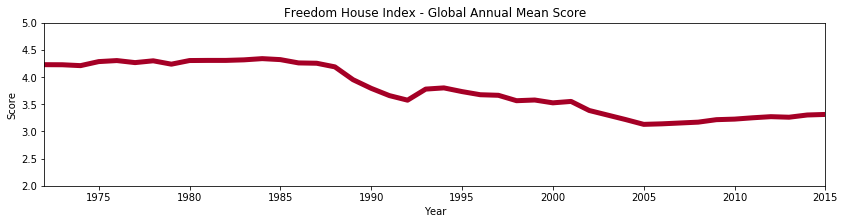

In [834]:
df['mean'] = df.mean(axis=1)
df['mean'].plot(xlim=(1972, 2015),ylim=(2, 5), figsize=(14,3), linewidth=5, colormap='RdYlGn')
plt.title('Freedom House Index - Global Annual Mean Score')
plt.xlabel('Year')
plt.ylabel('Score')
plt.savefig('fh_index_global_mean.png')

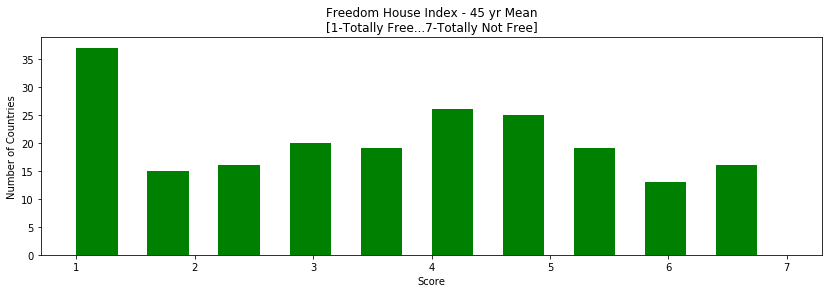

In [835]:
df.mean().hist(figsize=(14,4), grid='off', width=.35, color ='g')
plt.title('Freedom House Index - 45 yr Mean\n[1-Totally Free...7-Totally Not Free]')
plt.ylabel('Number of Countries')
plt.xlabel('Score')
plt.savefig('fh_bar_mean.pdf')

In [836]:
# top ten not free
df.mean().sort_values(ascending=False)[:10]

country
Yemen, S.                      7.000000
Korea, Dem. People���s Rep.    7.000000
Vietnam, N.                    7.000000
Somalia                        6.911111
Turkmenistan                   6.884615
Syrian Arab Republic           6.800000
Equatorial Guinea              6.622222
Iraq                           6.577778
Saudi Arabia                   6.555556
Germany, E.                    6.555556
dtype: float64

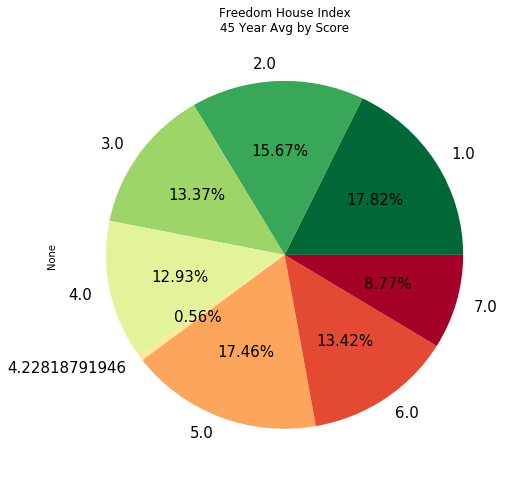

In [837]:
df2.mean(axis=1).plot(kind='pie', title='Freedom House Index\n45 Year Avg by Score', autopct='%.2f%%', fontsize=15, figsize=(8,8),colormap='RdYlGn_r')
plt.savefig('fh_pie_mean.png')

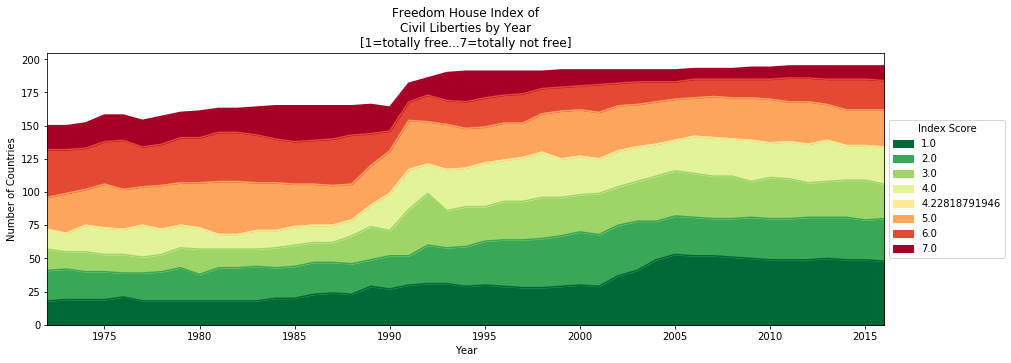

In [838]:
df2.T.plot(kind='area', figsize=(15,5),title='Freedom House Index of\nCivil Liberties by Year\n[1=totally free...7=totally not free]', colormap='RdYlGn_r')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), title='Index Score')
plt.xlabel('Year')
plt.ylabel('Number of Countries')
plt.savefig('fh_area_mean.png')

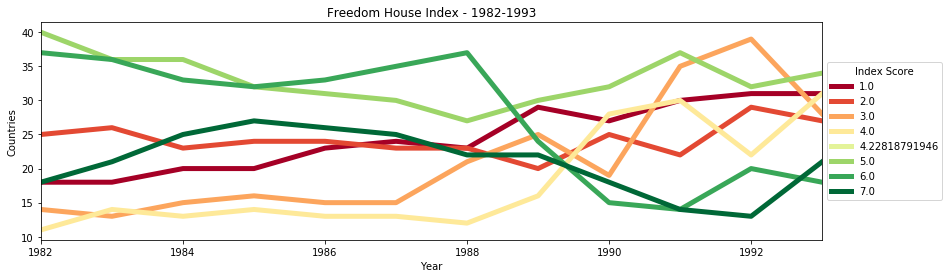

In [839]:
# drilling into 1982-1993 period
df2.T[10:22].plot(figsize=(14,4), title='Freedom House Index - 1982-1993', colormap='RdYlGn', linewidth=5)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), title='Index Score')
plt.xlabel('Year')  
plt.ylabel('Countries')
plt.savefig('breakout_82_93_mean.png')

- saving this for later
bins = list(range(8))
group_names = [str(i) for i in list(range(1,8))]
categories = pd.cut(df['mea  n'], bins, labels=group_names)
df['categories'] = pd.cut(df['mean'], bins, labels=group_names)
df['scoresBinned'] = pd.cut(df['mean'], bins)

pd.value_counts(df['categories']).plot(kind='pie')
plt.legend(title= 'Scores')

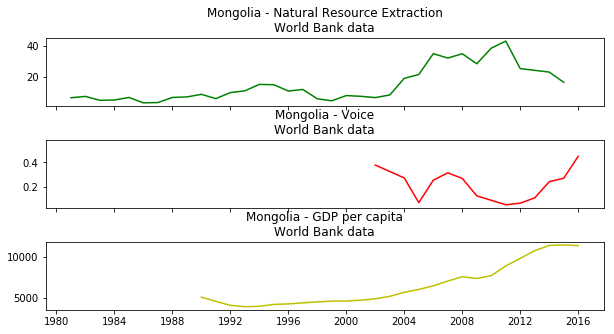

In [840]:
# country picker
df3 = fhfawb
mon = df3[df3['country'] == 'Mongolia']
f, (ax1, ax2, ax3) = plt.subplots(3, sharex=True, sharey=False, figsize=(10,5))
ax1.plot(mon.date, mon.nat, color='g')
ax1.set_title('Mongolia - Natural Resource Extraction\nWorld Bank data')
ax2.plot(mon.date, mon.voice, color='r')
ax2.set_title('Mongolia - Voice\nWorld Bank data')
ax3.plot(mon.date, mon.gdppc, color='y')
ax3.set_title('Mongolia - GDP per capita\nWorld Bank data')
f.subplots_adjust(hspace=.5)
plt.setp([a.get_xticklabels() for a in f.axes[:-1]], visible=False)
plt.savefig('fh_tripart_mean.png')